# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>PABLO RAMBLADO CARRASCO</mark>

# <font color='#ADD8E6'>**Ejercicio  3: Transfer Learning y fine-tuning con ResNet50 en el SPR X-Ray Age Prediction Challenge (3.5 points)**
<font color='#ADD8E6'>En este ejercicio trabajaremos con el _SPR X-Ray Age Prediction Challenge_ de Kaggle (https://www.kaggle.com/competitions/spr-x-ray-age/data). Este dataset consta de $10 702$ radiografías de tórax, y el objetivo es predecir la edad de la persona a partir de la imagen de la radiografía. En esta ocasión, se emplearán $6 702$ imágenes para entrenamiento y $4 000$ para test. Las edades oscilan entre los 18 y los 89 años. Para facilitar el trabajo al alumnado se proporciona una versión procesada de los datos (con resolución $224\times224$, en lugar de $1024\times1024$, y empleando solo ejemplos para los cuales se tiene salida deseada (dado que, al tratarse de una challenge de kaggle, el conjunto de test está disponible pero sin etiquetar)). Estos datos se pueden acceder desde: https://drive.google.com/drive/folders/1hCWfTLs1w0h5kObl6NEIhEtH5VDmmCnj?usp=sharing (se debe emplear una cuenta de la UGR para acceder a dicha URL, y la información allí contenida (directorio `spr-x-ray-age`) se debe incluir en la carpeta `Colab Notebooks`).

<font color='#ADD8E6'>Se debe emplear un $20\%$ de los datos de entrenamiento para validación, y el rendimiento debe ser evaluado, como mínimo, por medio de $MSE$, $MAE$ y $R^2$ _(coefficient of determination) score_. Se deben justificar las decisiones tomadas, como la elección de la función de pérdida. Del mismo modo, es necesario hacer un `summary()` de las arquitecturas empleadas en cada apartado, indicando qué parámetros/capas/bloques son entrenables y cuáles no lo son (es decir, en cada apartado es imprescindible destacar claramente qué arquitectura exacta se está utilizando, así como qué pesos se están entrenando y cuáles se están congelando).

<font color='#ADD8E6'>Usaremos un modelo ResNet50 pre-entrenado en ImageNet, y tendremos que realizar los siguientes experimentos en relación a la estrategia de entrenamiento:

<font color='#ADD8E6'>1. Partimos de ResNet50, adaptamos la cabecera (sustituyendo la cabecera anterior por *una única fully-connected* con el número de neuronas de salida adecuado), y reentrenamos (_from scratch_) la red entera para este nuevo problema. Es decir, partimos de pesos aleatorios para resolver este problema de regresión.

<font color='#ADD8E6'>2. Partimos de ResNet50, adaptamos la cabecera (empleando la misma del apartado anterior), y entrenamos solo la cabecera incorporada. Es decir, ResNet50 se usa como un mero extractor de características, y los pesos que se entrenan son los de la nueva capa incorporada (manteniendo fijos/congelados todos los demás).  

<font color='#ADD8E6'>3. Partimos de ResNet50, dejamos que fastai incorpore su cabecera por defecto (véase https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw o https://docs.fast.ai/vision.learner.html#head-and-model), y entrenamos solo la cabecera incorporada. Es decir, de nuevo, ResNet50 se usa como extractor de características, y los pesos que se entrenan son los de las nuevas capas incorporadas

<font color='#ADD8E6'>4. Partimos de ResNet50, adaptamos la cabecera (puede ser la del apartado 3.2 o la del 3.3), y hacemos un ajuste fino de toda la red partiendo de los pesos de ResNet50 (preentrenada en ImageNet).



<font color='#ADD8E6'>Es importante remarcar que estamos intentando resolver un problema de regresión por medio de la reutilización de un modelo pre-entrenado en un problema de clasificación (ImageNet). ¿Tiene sentido hacerlo? ¿Por qué nos sirven pesos entrenados en clasificación para un problema de regresión? ¿No son, acaso, problemáticas muy diferentes?

Sí, tiene sentido reutilizar un modelo preentrenado en clasificación, como ResNet50, para  un problema de regresión. Ya que los modelos preentrenados en conjuntos de datos enormes como ImageNet aprenden a reconocer características visuales muy importantes, como bordes, texturas y formas.

En el caso de la predicción de la edad a partir de radiografías de tórax, el objetivo es obtener un valor real en lugar de clasificar en categorías. Sin embargo, las características visuales capturadas por ResNet50 durante su preentrenamiento siguen siendo valiosas. Al reutilizar un modelo preentrenado, ajustamos la última capa del modelo para que produzca una salida continua, lo que nos permite aprovechar las representaciones aprendidas para predecir la edad. Ademas esto reduce el tiempo y los recursos en nuestro entrenamiento, requiriendo solo ajsutar las últimas capas.

En conclusión, aunque sean problemas distintos, las representaciones aprendidas en el modelo nos da la suficiente ventaja como para aplicarlo en predicciones de valores.


Importamos el modelo "resnet50".

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *
import torch.nn as nn
from torchvision.models import resnet50

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
# Function to display evaluation metrics
# Developed by Ignacio Oguiza: https://forums.fast.ai/t/plotting-metrics-after-learning/69937

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [ ]:
# defining the paths to images and labels
train_folder = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/train'
test_folder = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/test'
csv_path = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/All_labels.csv'

In [ ]:
if os.path.exists(csv_path):
    print("CSV File exists!")
    # reading the labels dataframe
    df = pd.read_csv(csv_path, dtype=float, index_col=0)
    print(f'Dataframe shape: {df.shape}')
else:
    print("File does not exist.")

CSV File exists!
Dataframe shape: (10702, 1)


In [ ]:
# defining the dataset paths
train_path = Path(train_folder)
test_path = Path(test_folder)

# reading the folders looking for images
train_files = get_image_files(train_path)
test_files = sorted(get_image_files(test_path))

print(f'{len(train_files)} files were found for training and {len(test_files)} files were found for test')

6702 files were found for training and 4000 files were found for test


Age varies from 18.0 to 89.0



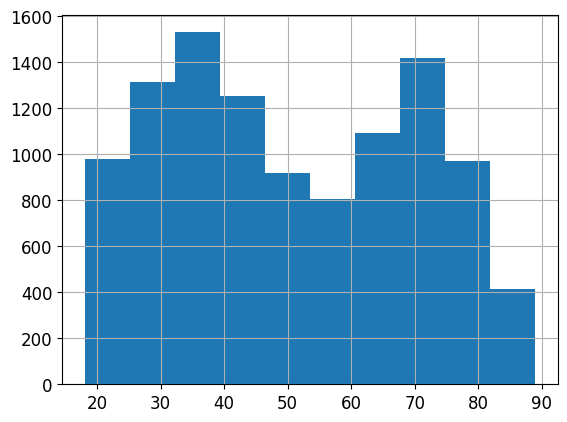

In [ ]:
print(f'Age varies from {df.age.min()} to {df.age.max()}\n')
_=df.age.hist()

In [ ]:
# function used to retun the label from an image
def label_func(file):
    # takes the file's base name w/o the extension
    basename = int(os.path.basename(str(file)).split('.')[0])

    # searches for the label
    label = int(df.age[basename])

    return label

Creamos el dataloader con un `bs=32`.

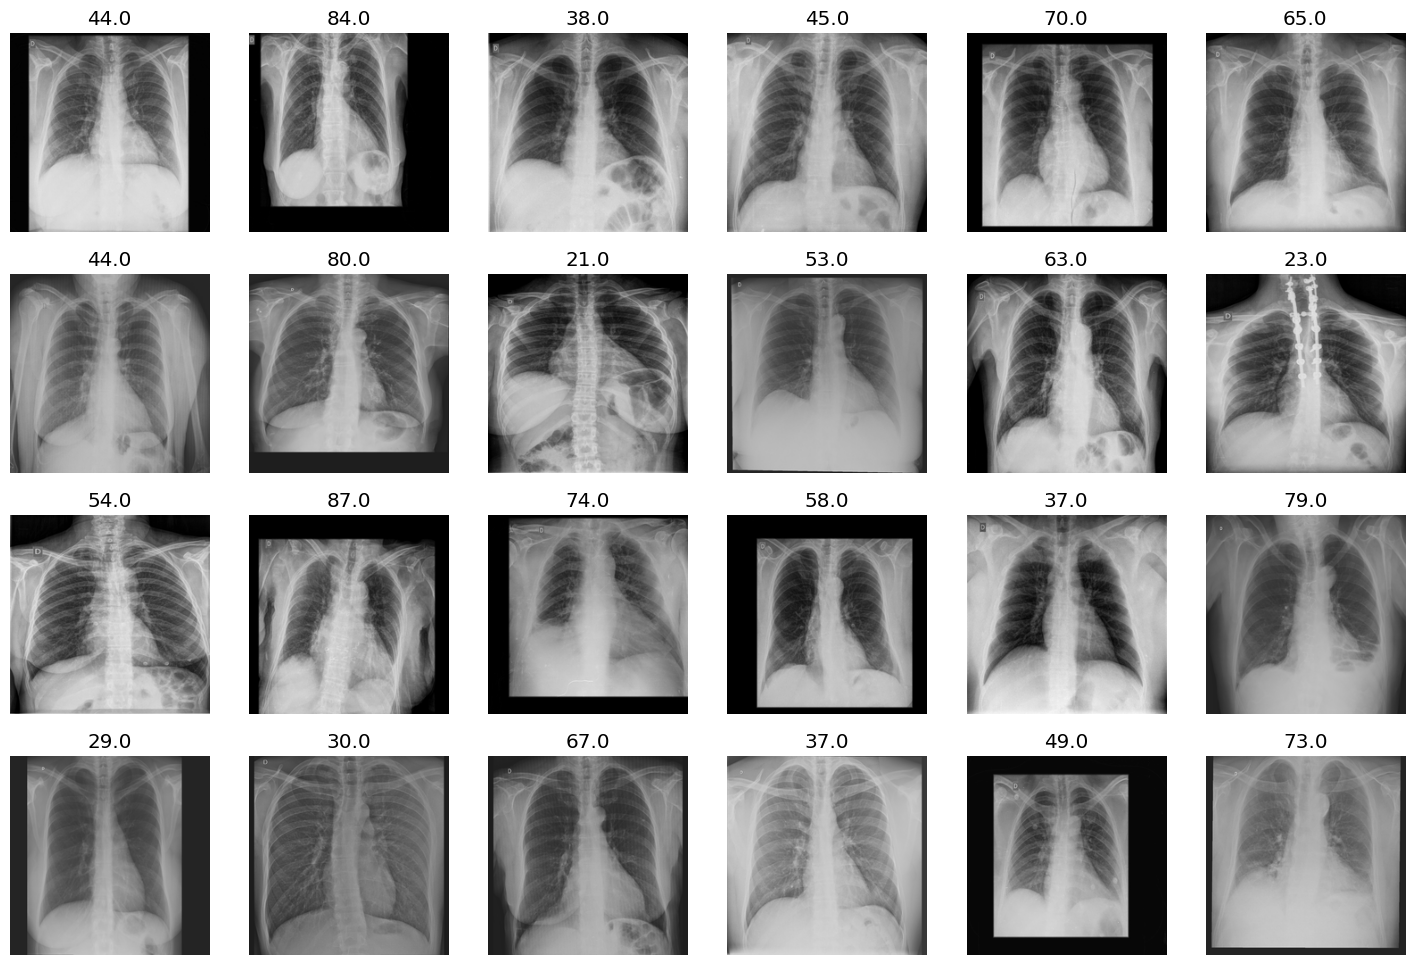

In [ ]:
# Definimos el DataBlock
dtblk = DataBlock(
    blocks=(ImageBlock, RegressionBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 20% validación
    get_y=label_func,
)

# Crear los dataloaders
dls = dtblk.dataloaders(train_folder, bs=32)
dls.show_batch(max_n=24)

## <font color='#ADD8E6'>3.1 Entrenamos todo ResNet50 _from scratch_, ajustando la cabecera para este problema.

### **ARQUITECTURA RESNET50**

Antes de empezar vamos a ver la arquitectura básica de ResNet50:

<img src="http://www.jesusutrera.com/articles/img/resnet.png" >

En la arquitectura ResNet50, la penúltima capa es una convolucional que genera una salida de 2048 canales. Esta salida pasa por la operación ya explicada de *Global Average Pooling*, seguida de un *flattening*, lo que produce un vector de características de 2048 dimensiones. Finalmente, este vector alimenta *fully connected* que originalmente tiene 1000 neuronas, correspondientes al número de clases en ImageNet. Para adaptarla a nuestro problema, como una tarea de regresión, sustituimos esta capa final por otra que genere únicamente 1 salida, representando nuestro objetivo a predecir (la edad de la persona).

En un modelo como ResNet50, la cabecera se refiere a las últimas capas del modelo, que son responsables de realizar la predicción final. Mientras que las primeras capas están diseñadas para extraer características generales de las imágenes (como bordes y texturas), las capas finales ajustan esas características para la tarea específica. En nuestro caso, modificamos la cabecera para que la salida corresponda a un único valor, adaptando la red preentrenada para predecir un valor continuo, en lugar de clasificar entre categorías. La capa personalizada que añadimos toma el vector de características de 2048 dimensiones y lo conecta a una sola neurona de salida, adecuada para una tarea de regresión

<br>

Entrenando el modelo con el parámetro `pretrained=False`, este se entrenará desde cero, es decir, no se cargarán los pesos preentrenados que se obtienen al entrenar previamente el modelo en un conjunto de datos, en este caso ImageNet. Y si ponemos  `pretrained=True`, el modelo se inicializa con los pesos preentrenados en este conjunto de datos. Esto último permite que el modelo aproveche las representaciones ya aprendidas (como características de bordes, formas y texturas) y las adapte al problema, lo que generalmente acelera el proceso de entrenamiento y mejora el rendimiento.

<br>

---

### **CABECERA**

Al usar `vision_learner` en el caso de no especificar una cabecera personalizada al modelo, es decir, dejando `custom_head=None`, fastai asigna automáticamente una nueva cabecera por defecto al modelo preentrenado que se utilice, a través del método `create_head`. Esta cabecera creada por defecto incluye una serie de capas que permiten adaptar las características extraídas por el backbone para la tarea final. Concretamente, está conformada por capas como **AdaptiveConcatPool2d**, seguida de **Flatten**, y dos bloques que combinan **BatchNorm + Dropout + Linear + ReLU**.

El modelo en su conjunto se divide principalmente en dos partes. La primera parte, conocida como el **backbone**, es la parte de la red encargada de extraer las características de la imagen. Esta corresponde a la sección `learn.model[0]` del modelo. La segunda parte, conocida como la **cabecera**, toma estas características extraídas y las adapta para la tarea final específica, como clasificación o regresión. Esta cabecera es totalmente dependiente del tipo de tarea que se desea realizar y corresponde a `learn.model[1]`. En el caso de nuestro problema de regresión, como la predicción de la edad, la cabecera generará una salida continua en lugar de una probabilidad de clase.

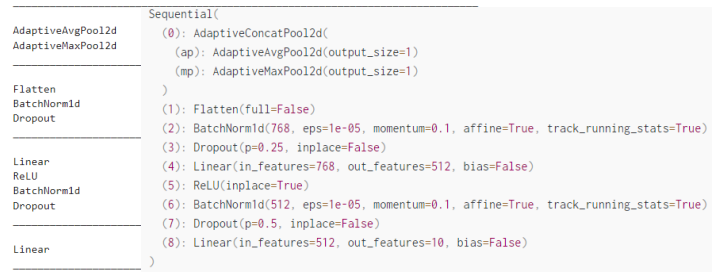

---
### **MÉTRICAS EMPLEADAS**

Antes de seguir, vamos a explicar en que consiste cada una de las tres métricas que se van a usar:

1. **MAE (Mean Absolute Error)** : Es una métrica utilizada en problemas de regresión para evaluar que tan precisas son las predicciones de un modelo en comparación con los valores reales, lo que significa que no se toma en cuenta si el modelo está sobrestimando o subestimando, solo la magnitud del error. En este caso, se utiliza para medir la diferencia promedio entre la edad predicha por el modelo a partir de las radiografías y la edad real de la persona. El cálculo del MAE se basa en las diferencias absolutas entre las predicciones y los valores reales.
<br>
Un valor bajo indica que el modelo realiza predicciones más precisas, con menores diferencias respecto a los valores reales, mientras que un valor alto significa que el modelo se desvía mas de los valores reales. Un MAE de 0 sería ideal, ya que indicaría que el modelo no comete ningún error. Aunque no proporciona información sobre la dirección del error, es decir, si el modelo tiende a predecir edades más altas o más bajas que las reales.

<br>

2. **RMSE (Root Mean Squared Error)**: Otra métrica clave en la precisión de un modelo de regresión. Mide la diferencia promedio entre los valores predichos por el modelo y los valores reales, proporcionando una estimación de la magnitud del error del modelo. A diferencia de otras métricas, este penaliza más los errores grandes porque eleva al cuadrado las diferencias entre las predicciones y los valores reales. Esto significa que los errores grandes tienen un impacto mucho mayor en el resultado final, lo que hace que el RMSE sea más sensible a desviaciones grandes en las predicciones.
<br>
Cuanto menor sea el valor del RMSE, mejor será el modelo, ya que indica que las predicciones están más cerca de los valores reales. Un RMSE de 0 sería ideal, indicando que las predicciones son perfectas. Además, el RMSE se expresa en las mismas unidades que la variable que se está prediciendo, lo que facilita su interpretación. Por ejemplo, en nuestro modelo, un RMSE de 3 significaría que las predicciones están, en promedio, a 3 años de la edad real.

<br>

3. **$R^2$ Score (coefficient of determination)** : Métrica utilizada para evaluar la calidad de un modelo predictivo, especialmente en regresión. Mide la proporción de la variabilidad de los resultados que el modelo puede explicar. Es decir, indica qué tan bien el modelo ajusta los datos observados. Un valor de $R^2$ cercano a 1 significa que el modelo explica casi toda la variación en los datos, mientras que un valor cercano a 0 indica que el modelo no es capaz de explicar la variabilidad.
<br>
El $R^2$ Score se calcula como el cuadrado del coeficiente de correlación en regresión lineal, lo que indica la relación entre las variables. Aunque generalmente los valores de $R^2$ están entre 0 y 1, Un $R^2$ negativo significa que el modelo tiene un rendimiento muy pobre, lo que indica que el modelo es peor que una simple media de los valores.

<br>

---

### **FUNCIÓN DE PÉRDIDA**

Finalmente, nuestra función de pérdida será `MSELossFlat`. Variante de `nn.MSELoss` que, al igual que esta, calcula el error cuadrático medio (Mean Squared Error, MSE) entre los valores de entrada y los objetivos. Pero esta primera  realiza un *flattening* tanto la entrada como el objetivo antes de calcular la pérdida.

En nuestro problema de regresión, tiene sentido utilizar `MSELossFlat` como función de pérdida porque penaliza con más intensidad los errores grandes, lo cual es importante dado el rango amplio de edades. Esto significa que la forma en que entrenamos el modelo (minimizando el error) está alineada con las métricas que usamos para medir su rendimiento. Al utilizar `MSELossFlat` y las métricas como `rmse` y `mae`, nos aseguramos de que el modelo esté aprendiendo de manera efectiva para reducir los errores, y que los resultados sean fáciles de entender y adecuados para el objetivo del desafío, es decir, predecir la edad de manera precisa.

En este ejercicio, usaremos `vision_learner` en lugar del `Learner` general. Esto se debe a que está específicamente diseñado para tareas de visión por computadora, como clasificación de imágenes o regresión en este caso. Además viene optimizado con configuraciones predeterminadas (como normalizaciones, transformaciones...) que facilitan el trabajo sin necesidad de configurarlas manualmente.

Usamos **`AdaptiveAvgPool2d(1)`** en lugar de **`AvgPool2d`** en este contexto ya proporciona flexibilidad al adaptar automáticamente la salida a un tamaño 1x1, independientemente del tamaño de entrada. Esto en modelos como ResNet50, donde el tamaño de las imágenes puede variar, garantizando que la salida siempre será un vector de características de tamaño fijo (2048) antes de pasar por la capa completamente conectada. En cambio, ya vimos que **`AvgPool2d`** requiere un tamaño de ventana fijo, lo que no se adapta bien a imágenes de diferentes tamaños, limitando su uso en redes que deben manejar variabilidad en las entradas.

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

0.00363078061491251


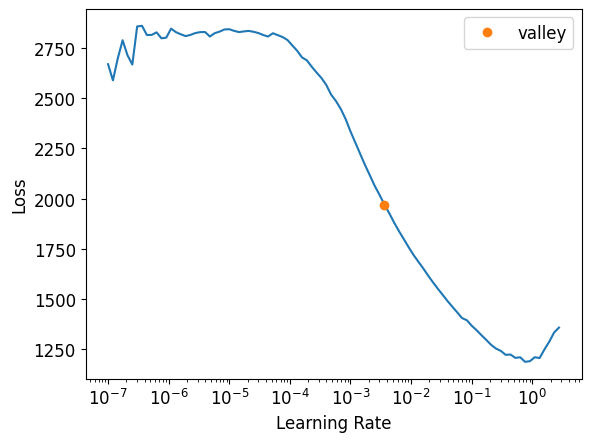

In [ ]:
# Cambiar la última capa para obtener 1 salida
custom_head = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),   # Reduce la salida a 1x1 para cada imagen
    nn.Flatten(),              # Convierte la salida en un vector de 2048 dimensiones
    nn.Linear(2048, 1)         # Capa completamente conectada
)

learn = vision_learner(
    dls,
    resnet50,
    pretrained=False,  # Entrenar desde cero
    custom_head=custom_head,  # Pasar la nueva capa final
    metrics=[mae, rmse, R2Score()],
    loss_func=MSELossFlat(),
)

lr = learn.lr_find()
print(lr[0])

En este ejercicio, se utiliza la arquitectura de ResNet50 entrenada desde cero, es decir, sin utilizar los pesos preentrenados de ImageNet. Esto significa que **todos los parámetros del modelo, incluidas las capas iniciales y la nueva cabecera personalizada  son entrenables**. Ya que como he explicado, al configurar `pretrained=False`, no se aprovechan las características previamente aprendidas en otro conjunto de datos, por lo que el modelo comienza con pesos aleatorios. Podemos ver que el número total de parámetros entrenables es de **23,510,081**, y no hay parámetros no entrenables en este caso.

Es importante destacar que, como no se utilizan pesos preentrenados, todo el entrenamiento se realiza desde cero, lo que puede hacer que el proceso de ajuste sea más largo y menos eficiente en comparación con usar un modelo preentrenado, que ya tiene conocimientos generales sobre las características visuales. Por lo que, el modelo debe aprender desde el inicio todas las representaciones necesarias para resolver el problema.

In [ ]:
learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

Finalmente con `fit_one_cycle` aseguramos que todas las capas del modelo (incluyendo las capas iniciales y la nueva cabecera personalizada) sean entrenadas desde cero.

In [ ]:
learn.fit_one_cycle(10, lr_max=lr[0])

epoch,train_loss,valid_loss,mae,_rmse,r2_score,time
0,351.432312,331.347198,15.948697,18.202944,0.039260,01:19
1,280.713135,350.472260,15.235401,18.720905,-0.016193,01:20
2,239.072220,595.704651,20.638388,24.407061,-0.727243,01:15
3,196.822281,202.721619,11.686681,14.238035,0.412209,01:16
4,165.896149,334.785400,14.802026,18.297142,0.029291,01:17
5,152.662552,360.928497,15.630324,18.998119,-0.046511,01:16
6,127.843094,126.398796,8.972592,11.242722,0.633507,01:17
7,118.008034,105.523834,8.036561,10.272479,0.694034,01:18
8,98.153481,97.445938,7.788981,9.871471,0.717456,01:17
9,90.128220,95.760658,7.656888,9.785738,0.722342,01:17


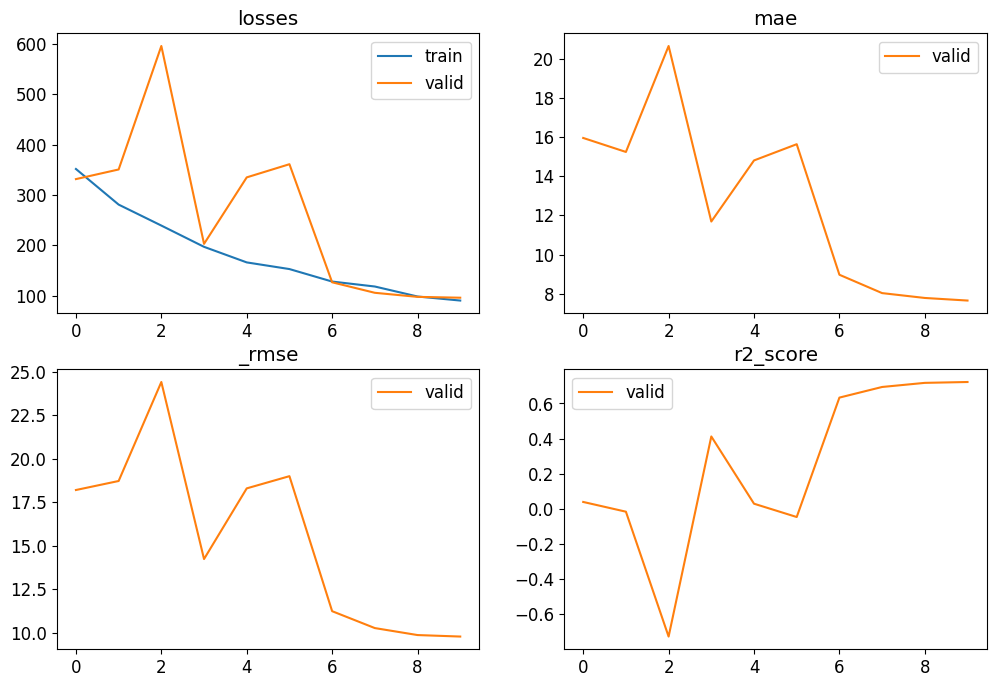

In [ ]:
learn.recorder.plot_metrics()

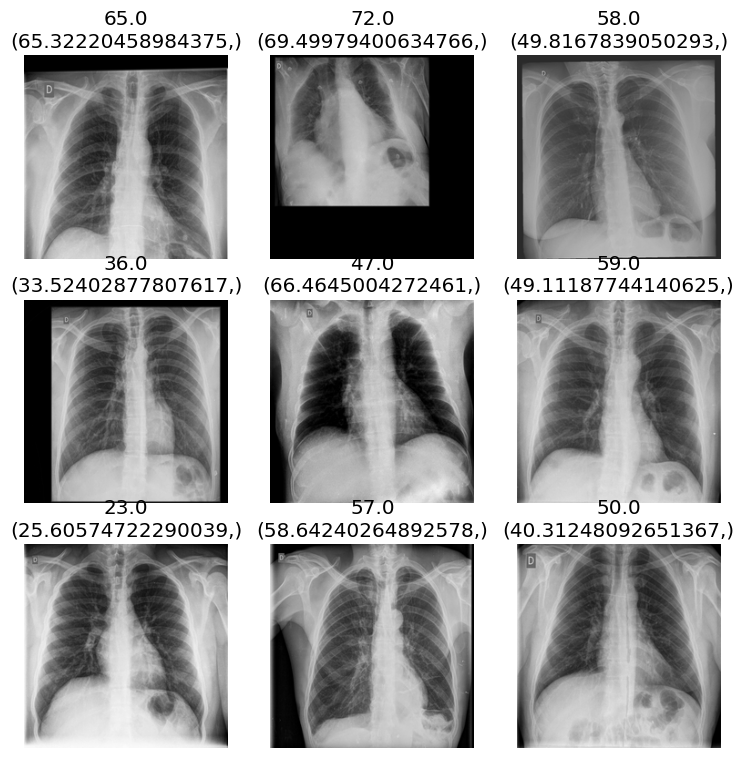

In [ ]:
learn.show_results()

## <font color='#ADD8E6'>3.2. ResNet50 se usa como extractor de características: Entrenamos solo la cabecera incorporada.



Volvemos a entrenar el mismo modelo con la misma cabecera, pero esta vez utilizando los pesos preentrenados del mismo (`pretrained=True`).

Cuando usamos `vision_learner` con `pretrained=True`, este automáticamente congela las capas del modelo base preentrenado, dejando únicamente la cabeza personalizada entrenable sin necesidad de usar `learn.freeze()`. Además, el parámetro `train_bn=False` asegura que las capas de normalización por lotes (*BatchNorm*) también se congelen junto con el resto del modelo base, evitando que sus parámetros y estadísticas se actualicen durante el entrenamiento,

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 123MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

0.03981071710586548


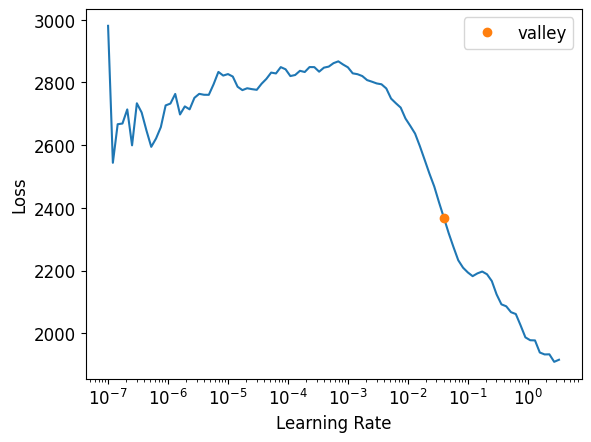

In [ ]:
learn = vision_learner(
    dls,
    resnet50,
    pretrained=True,  # Utilizar pesos preentrenados en ResNet50
    train_bn=False,
    custom_head=custom_head,
    metrics=[mae, rmse, R2Score()],
    loss_func=MSELossFlat()
)

lr = learn.lr_find()
print(lr[0])

En este caso, el modelo ResNet50 se emplea como extractor de características al reutilizar sus capas convolucionales preentrenadas y congelarlas, es decir, evitando que sus pesos sean actualizados durante el entrenamiento. Esto es evidente en el *summary*, ya que todas las capas convolucionales tienen `Trainable: False`. Solo los pesos de la nueva cabecera personalizada, que lo conforman una capa **AdaptiveAvgPool2d**, seguida de un **Flatten** y una **Linear** con salida de 1, son entrenables. Con esto aprovechamos las características aprendidas previamente por ResNet50 en ImageNet, mientras que la cabecera se entrena específicamente para ajustar las predicciones al problema actual. De los **23,510,081 de parámetros** del modelo, solo **2,049** entrenables pertenecen a la cabecera y son ajustados durante el entrenamiento, lo que reduce significativamente el tiempo y los recursos necesarios para el ajuste del modelo.

In [ ]:
learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

Aqui con `fit_one_cycle` entrenamos únicamente la cabecera personalizada del modelo, mientras que las capas iniciales de ResNet50 permanecen "congeladas. De esta forma, ajustamos solo la cabecera aprovechando las características generales ya aprendidas por el modelo base.

In [ ]:
learn.fit_one_cycle(10, lr_max=lr[0])

epoch,train_loss,valid_loss,mae,_rmse,r2_score,time
0,586.951477,445.239838,17.821901,21.100704,-0.290971,00:52
1,273.240265,230.454178,12.367471,15.180717,0.331799,00:48
2,200.064819,201.517868,11.460210,14.195699,0.415700,00:49
3,169.159073,176.846649,10.661317,13.298370,0.487234,00:49
4,160.333313,177.713104,10.662715,13.330909,0.484722,00:49
5,151.955658,175.621933,10.647036,13.252243,0.490785,00:56
6,139.455048,169.949142,10.463204,13.036456,0.507233,00:50
7,134.915909,166.019562,10.353015,12.884859,0.518627,00:49
8,135.861588,165.521027,10.306323,12.865498,0.520073,00:50
9,129.579330,164.548019,10.299176,12.827627,0.522894,00:55


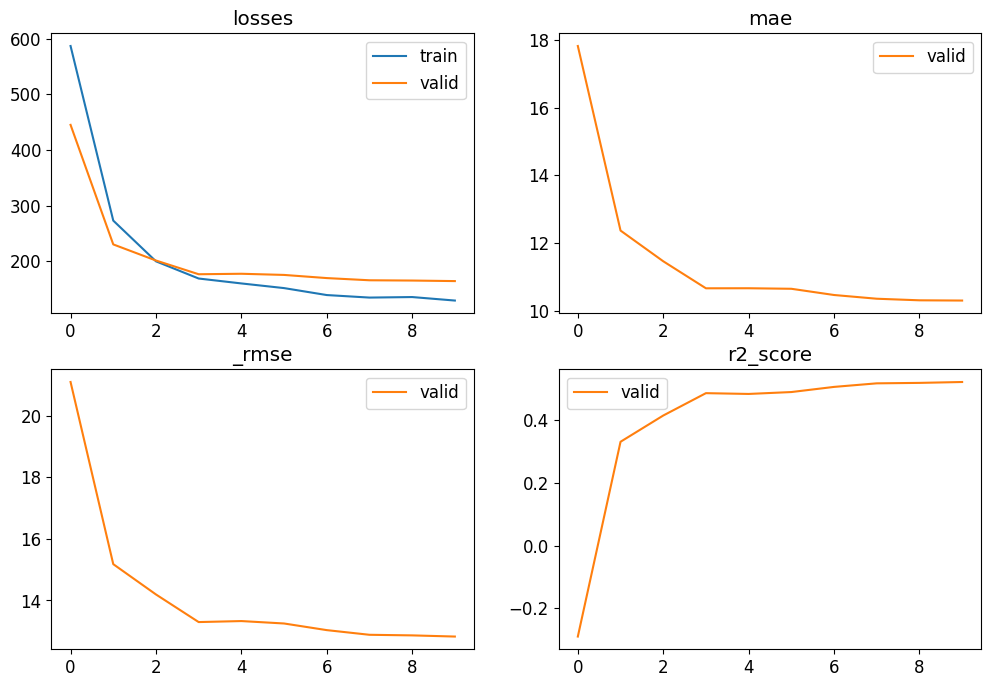

In [ ]:
learn.recorder.plot_metrics()

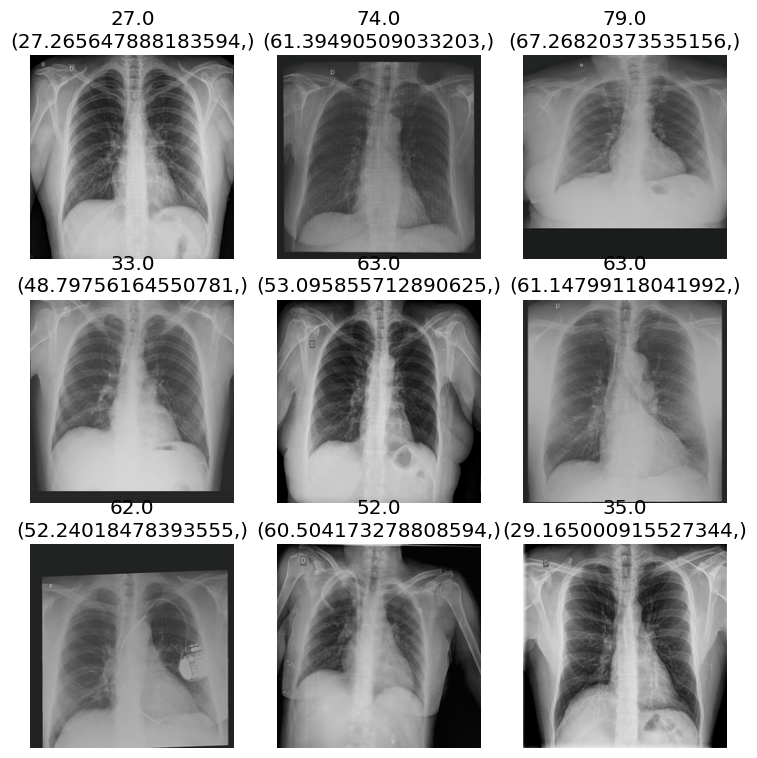

In [ ]:
learn.show_results()

## <font color='#ADD8E6'>3.3. ResNet50 se usa como extractor de características: Entrenamos solo la cabecera incorporada por defecto por fastai.



Haremos lo mismo que en el anterior ejercicio, pero utilizando la cabecera por defecto. Solo nos basta con usar el modelo base de ResNet50 utilizando en este caso los pesos preentrenados.

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

0.02290867641568184


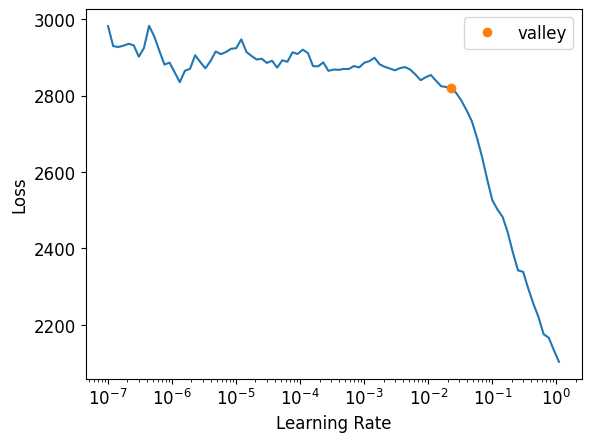

In [ ]:
# Learner sin la cabecera personalizada y con pesos
learn = vision_learner(
    dls,
    resnet50,
    pretrained=True,
    train_bn=False,
    loss_func=MSELossFlat(),
    metrics=[mae, rmse, R2Score()]
)

# Congelar para que solo se entrene la cabecera
learn.freeze()

lr = learn.lr_find()
print(lr[0])

Aquí, el modelo ResNet50 también se utiliza como extractor de características, congelando sus capas convolucionales preentrenadas para que sus pesos permanezcan fijos durante el entrenamiento, tal como se muestra en el summary donde estas capas tienen `Trainable: False`. Sin embargo, a diferencia del ejercicio anterior, la cabecera no es personalizada, sino que se usa la cabecera predeterminada de **fastai**, la cual introduce más parámetros entrenables, **2,106,880** frente a **2,049** del ejercicio anterior. Esto permite un ajuste más complejo y flexible para el problema actual, aunque su tiempo computacional es mas elevado durante el entrenamiento.

In [ ]:
learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

In [ ]:
learn.fit_one_cycle(10, lr_max=lr[0])

epoch,train_loss,valid_loss,mae,_rmse,r2_score,time
0,918.400269,228.024750,12.130113,15.100489,0.338843,00:47
1,232.456497,181.324097,10.891684,13.465664,0.474252,00:50
2,171.586960,160.070511,10.065189,12.651896,0.535876,00:50
3,160.327774,165.205872,10.303512,12.853245,0.520986,00:51
4,163.791687,174.560135,10.561361,13.212120,0.493864,00:51
5,148.600052,154.387085,9.889266,12.425261,0.552355,00:51
6,133.064087,834.754639,11.000909,28.892120,-1.420368,00:52
7,114.642624,469.540863,10.200050,21.668888,-0.361431,00:51
8,108.279800,160.680115,9.751687,12.675965,0.534109,00:58
9,102.287323,162.827728,9.836326,12.760397,0.527882,00:50


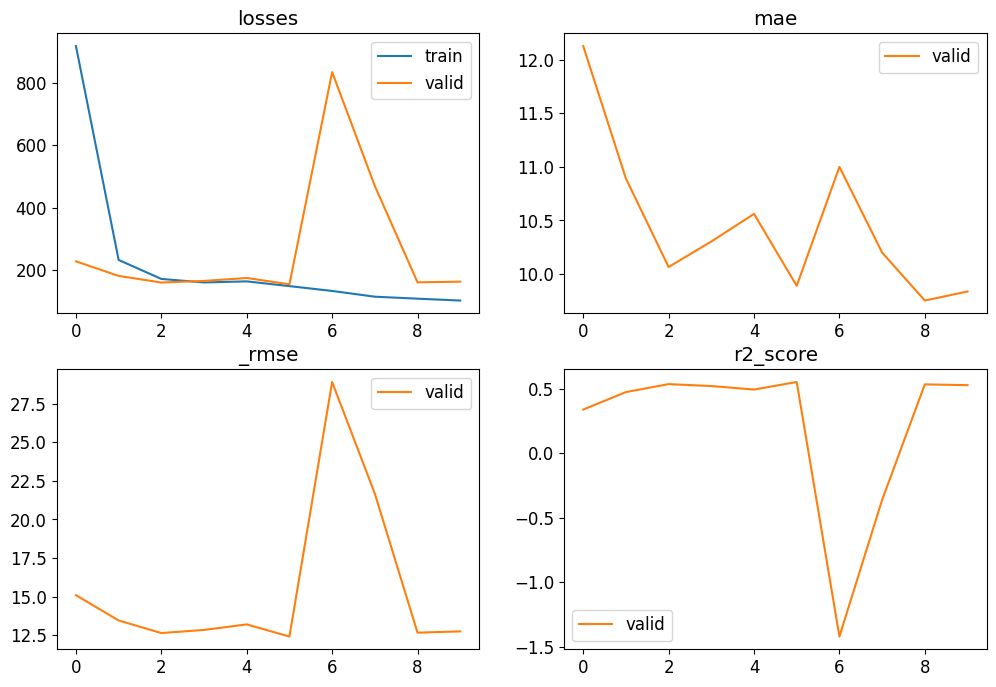

In [ ]:
learn.recorder.plot_metrics()

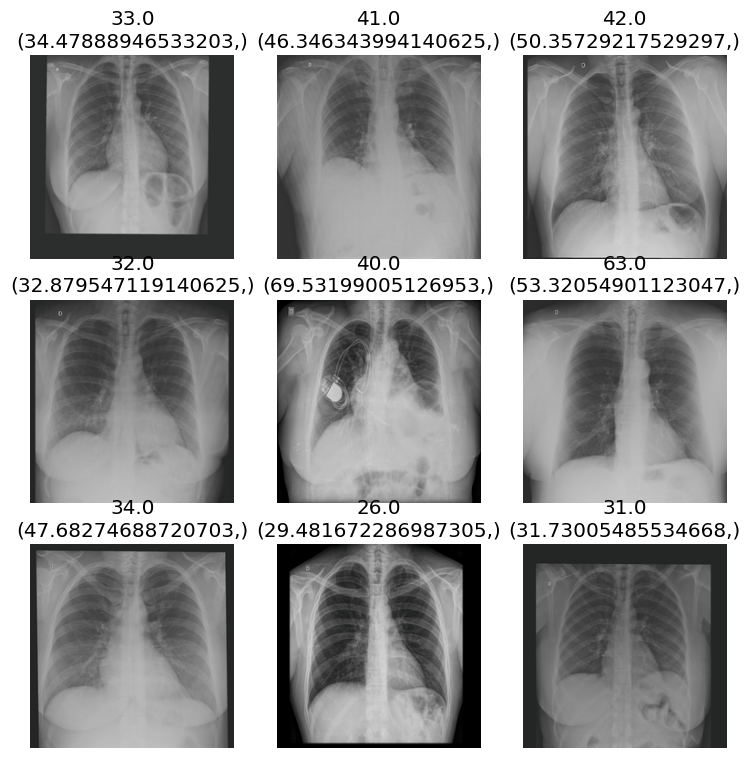

In [ ]:
learn.show_results()

## <font color='#ADD8E6'>3.4. Hacemos un ajuste fino (fine-tuning) de toda la red partiendo de los pesos de ImageNet.

Pesos preentrenados + cabecera personalizada.

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

0.03981071710586548


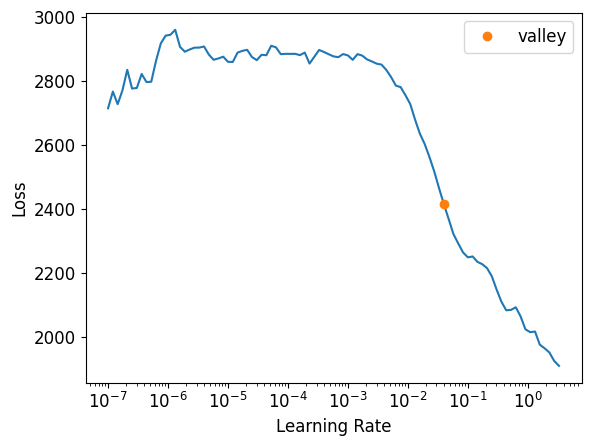

In [ ]:
learn = vision_learner(
    dls,
    resnet50,
    pretrained=True,
    train_bn=False,
    custom_head=custom_head,
    loss_func=MSELossFlat(),
    metrics=[mae, rmse, R2Score()]
)

lr = learn.lr_find()
print(lr[0])

En este caso, al partir de ResNet50 preentrenada en ImageNet, se congela inicialmente la red para entrenar solo la cabecera personalizada adaptada (como en el apartado 3.2). Esto se observa en el summary, donde los pesos de las capas convolucionales preexistentes permanecen `Trainable: False`, mientras que los únicos parámetros entrenables son los **2,049** pertenecientes a la cabecera. Esto permite aprovechar las características previamente aprendidas por ResNet50, ajustando únicamente los pesos de la cabecera al problema específico.

In [ ]:
learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

El método `learn.fine_tune(epochs, freeze_epochs)` realiza un ajuste fino de un modelo preentrenado de manera eficiente, aprovechando las capas ya entrenadas (en nuestro caso las de ResNet50).

En la primera fase, **entrena la cabecera**  durante un número de épocas especificado por `freeze_epochs` (por defecto, 1), con las capas base del modelo congeladas. Esto permite que la cabecera se adapte rápidamente a la nueva tarea, usando un **learning rate más alto** para que el modelo se enfoque más en las nuevas capas.

Una vez que la cabecera se ha entrenado adecuadamente, se **descongela todas las capas** del modelo base y realiza un ajuste fino del modelo completo durante el número restante de épocas (`epochs`). En esta etapa, el modelo realiza un ajuste más suave de las capas preentrenadas para afinar los pesos sin perder las representaciones importantes que ya ha aprendido, usando un **learning rate más bajo**. Esto permite que el modelo se ajuste mejor a los nuevos datos sin olvidar las características previamente aprendidas.

In [ ]:
learn.fine_tune(10, base_lr=lr[0])

epoch,train_loss,valid_loss,mae,_rmse,r2_score,time
0,437.198853,300.072479,14.358065,17.322599,0.129941,00:49


epoch,train_loss,valid_loss,mae,_rmse,r2_score,time
0,92.128830,97.000931,7.920087,9.848905,0.718746,01:18
1,72.128845,88.861687,7.536555,9.426648,0.742346,01:16
2,71.296486,63.962955,6.317341,7.997684,0.814540,01:18
3,49.937199,65.867989,6.277389,8.115910,0.809016,01:18
4,30.613153,59.018585,6.108780,7.682357,0.828876,01:18
5,26.665749,58.442245,6.009026,7.644753,0.830547,01:19
6,16.977551,60.156105,6.154722,7.756037,0.825578,01:19
7,8.095303,43.106617,5.161419,6.565563,0.875013,01:18
8,4.926073,42.071766,5.110831,6.486276,0.878013,01:20
9,2.502541,41.835918,5.089256,6.468069,0.878697,01:20


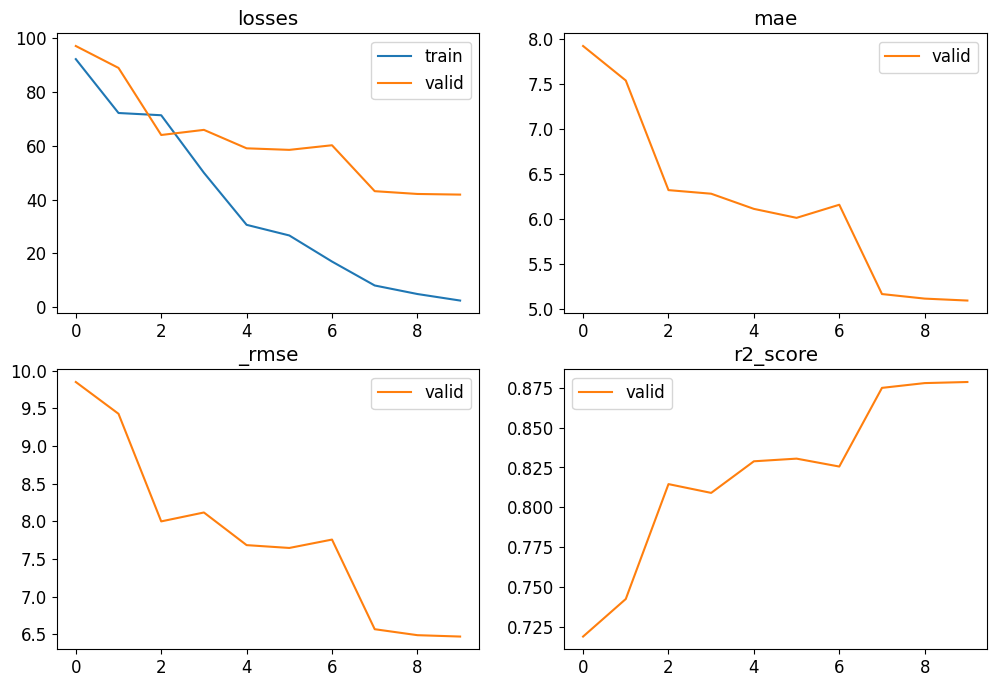

In [ ]:
learn.recorder.plot_metrics()

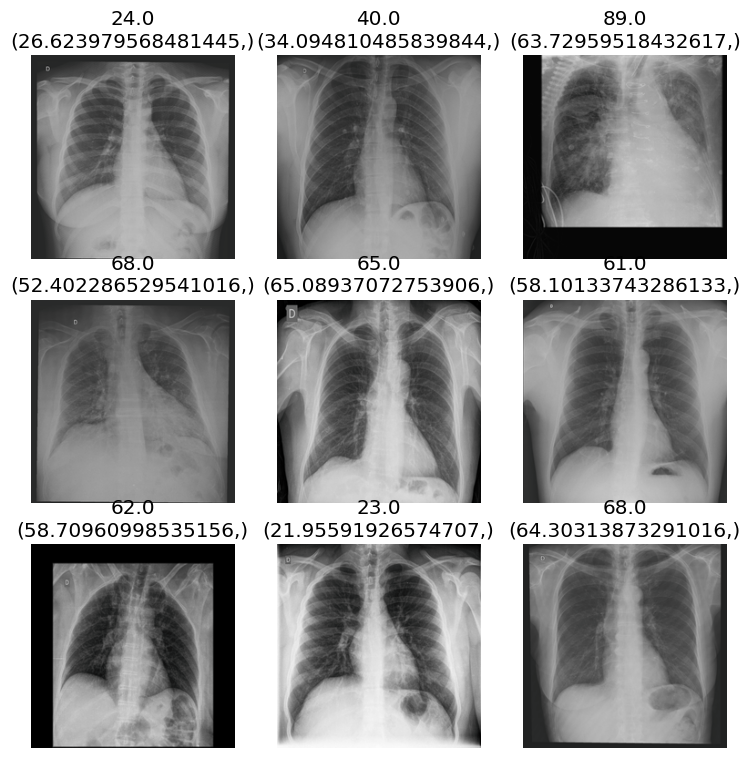

In [ ]:
learn.show_results()

## <font color='#ADD8E6'>Conclusiones. ¿Qué conclusiones se pueden extraer en base a toda la experimentación anterior? En caso de que nos enfrentemos a un nuevo problema, ¿qué opción, u opciones, de entre las anteriores, parece a priori la más razonable? ¿Por qué?

En este contexto, congelar las capas convolucionales del modelo preentrenado, como se hizo en el primer experimento, permite aprovechar las características generales aprendidas previamente, manteniendo el tiempo de entrenamiento y los recursos computacionales bajo control. Este enfoque resulta eficiente al no requerir la adaptación de toda la red, y es útil cuando el dominio del dataset es similar al de ImageNet, ya que las características generales que el modelo ya ha aprendido pueden aplicarse de manera directa.

Por otro lado, cuando no se congelan las capas, como en el segundo problema, se permite que todo el modelo ajuste sus pesos. Aunque esto aumenta la flexibilidad del modelo para adaptarse específicamente al nuevo problema, también introduce el riesgo de sobreajuste, particularmente si no se tienen suficientes datos o si las características del dominio del problema son muy diferentes de las que el modelo preentrenado ha aprendido. Sin embargo, en el caso de un dataset de 6000 imágenes, el modelo puede tener suficiente información para ajustar sus pesos sin caer en sobreajuste.

El tercer problema, que introduce una cabecera más compleja, muestra cómo este tipo de diseño puede ser útil en un problema de este tamaño, dado que 6000 imágenes proporcionan una base sólida de datos para que la red aprenda características más complejas. No obstante, una cabecera más compleja también puede incrementar la posibilidad de sobreajuste, lo cual es visible en sus resultados.

Finalmente, el ajuste fino de toda la red, como se presenta en el cuarto experimento, demuestra ser la estrategia más equilibrada. Congelar inicialmente las capas y luego permitir el ajuste fino de la red permite que el modelo aproveche las características generales aprendidas en ImageNet, mientras adapta los detalles a las especificaciones del problema en cuestión. Con un dataset de 6000 imágenes, este enfoque asegura que el modelo no solo aproveche los patrones generales de las capas convolucionales preentrenadas, sino que también pueda ajustarse finamente a las particularidades del nuevo dataset, lo que resulta en un rendimiento superior con menores pérdidas y mejores métricas.

**Este último demuestra ser el mejor enfoque para maximizar el rendimiento del modelo**. Como se puede observar en los resultados, las pérdidas disminuyen significativamente tanto en el conjunto de entrenamiento como en el de validación, indicando que el modelo logra ajustarse adecuadamente sin sobreajustarse, en comparación con el resto (aunque el primer apartado no se queda muy atrás). Además, métricas como el RMSE y el MAE muestran una mejora constante, reflejando un error más bajo en las predicciones. Por último, el aumento en el R² confirma que el modelo captura mejor la variabilidad de los datos. Este comportamiento valida que la estrategia de comenzar con los pesos preentrenados y luego realizar el ajuste fino permite un balance óptimo entre el uso de características generales y la adaptación específica al dataset.